In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#dataset
from sklearn.datasets import load_boston
boston=load_boston()

In [11]:
df_data=pd.DataFrame(boston.data,columns=boston.feature_names)
df_target=pd.DataFrame(boston.target,columns=['MEDV'])
boston_df=pd.concat((df_data,df_target),axis=1)
boston_df.head(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [12]:
#extract paticular feature
lstat=boston_df.loc[:,['LSTAT']].values
rm=boston_df.loc[:,['RM']].values
y=boston_df.loc[:,['MEDV']].values

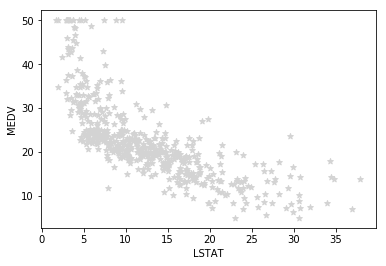

In [16]:
#lstat vs y scatter
plt.scatter(lstat,y,c='lightgrey',marker='*')
plt.xlabel('LSTAT')
plt.ylabel('MEDV')
plt.show()

In [17]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()

In [18]:
from sklearn.cross_validation import train_test_split
ls_train,ls_test,y_train,y_test=train_test_split(lstat,y,test_size=0.3,random_state=0)

In [19]:
lr.fit(ls_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

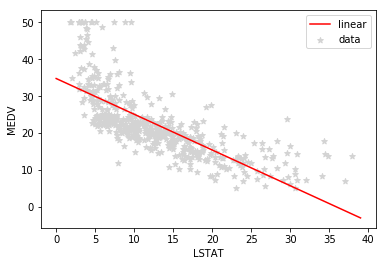

In [25]:
x=np.arange(0,40,1)[:,np.newaxis] #列ベクトルにする
plt.plot(x,lr.predict(x),c='r',label='linear')
plt.scatter(lstat,y,c='lightgrey',marker='*',label='data')
plt.xlabel('LSTAT')
plt.ylabel('MEDV')
plt.legend(loc='upper right')
plt.show()

In [24]:
np.arange(0,40,1)[:10,np.newaxis]

array([[0],
       [1],
       [2],
       [3],
       [4],
       [5],
       [6],
       [7],
       [8],
       [9]])

多項式回帰のための変数変換 

In [29]:
from sklearn.preprocessing import PolynomialFeatures
quad=PolynomialFeatures(degree=2) #多項式回帰のための特徴量の次元を決める
lstat_quad=quad.fit_transform(lstat) #lstatをquadの形に拡張
lstat_quad[:10]

array([[   1.    ,    4.98  ,   24.8004],
       [   1.    ,    9.14  ,   83.5396],
       [   1.    ,    4.03  ,   16.2409],
       [   1.    ,    2.94  ,    8.6436],
       [   1.    ,    5.33  ,   28.4089],
       [   1.    ,    5.21  ,   27.1441],
       [   1.    ,   12.43  ,  154.5049],
       [   1.    ,   19.15  ,  366.7225],
       [   1.    ,   29.93  ,  895.8049],
       [   1.    ,   17.1   ,  292.41  ]])

In [53]:
lr_quad=LinearRegression()
lstat_quad_train,lstat_quad_test,y_train,y_test=train_test_split(lstat_quad,y,test_size=0.3,random_state=0)
lr_quad.fit(lstat_quad_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

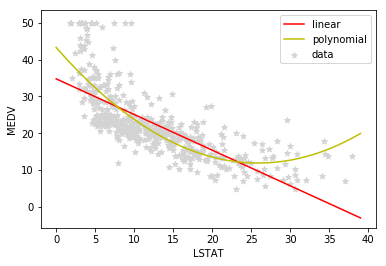

In [54]:
x=np.arange(0,40,1)[:,np.newaxis] #列ベクトルにする
plt.plot(x,lr.predict(x),c='r',label='linear')
x_quad=quad.fit_transform(x) #predictの入力は３次元である必要がある。
plt.plot(x,lr_quad.predict(x_quad),c='y',label='polynomial')
plt.scatter(lstat,y,c='lightgrey',marker='*',label='data')
plt.xlabel('LSTAT')
plt.ylabel('MEDV')
plt.legend(loc='upper right')
plt.show()

３次関数による回帰

In [55]:
q3d=PolynomialFeatures(degree=3)
ls3d=q3d.fit_transform(lstat)
lr_q3d=LinearRegression()
ls3d_train,ls3d_test,y_train,y_test=train_test_split(ls3d,y,test_size=0.3,random_state=0)
lr_q3d.fit(ls3d_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

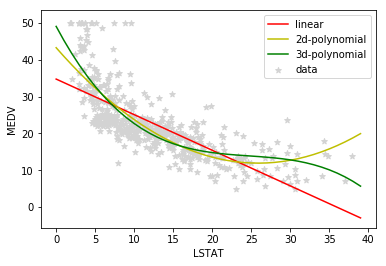

In [56]:
x=np.arange(0,40,1)[:,np.newaxis] #列ベクトルにする
plt.plot(x,lr.predict(x),c='r',label='linear')
x_quad=quad.fit_transform(x) #predictの入力は３次元である必要がある。
x_q3d=q3d.fit_transform(x)
plt.plot(x,lr_quad.predict(x_quad),c='y',label='2d-polynomial')
plt.plot(x,lr_q3d.predict(x_q3d),c='green',label='3d-polynomial')
plt.scatter(lstat,y,c='lightgrey',marker='*',label='data')
plt.xlabel('LSTAT')
plt.ylabel('MEDV')
plt.legend(loc='upper right')
plt.show()

In [57]:
def adjusted(score, n_sample, n_features):
    adjusted_score = 1 - (1 - score) * ((n_sample - 1) / (n_sample - n_features - 1))
    return adjusted_score

In [59]:
# 自由度調整済み決定係数をtrainとtestに分けて出力
print('adjusted R^2')
print('')

# 線形回帰
print('model_linear')
print('train: %.3f' % adjusted(lr.score(ls_train, y_train), len(y_train), 1))
print('test : %.3f' % adjusted(lr.score(ls_test, y_test), len(y_test), 1))
print('')

# 2次関数
print('model_quad')
print('train: %.3f' % adjusted(lr_quad.score(lstat_quad_train, y_train), len(y_train), 2))
print('test : %.3f' % adjusted(lr_quad.score(lstat_quad_test, y_test), len(y_test), 2))
print('')

# 3次関数
print('model_cubic')
print('train: %.3f' % adjusted(lr_q3d.score(ls3d_train, y_train), len(y_train), 3))
print('test : %.3f' % adjusted(lr_q3d.score(ls3d_test, y_test), len(y_test), 3))

adjusted R^2

model_linear
train: 0.551
test : 0.519

model_quad
train: 0.656
test : 0.591

model_cubic
train: 0.672
test : 0.607


別の変数を同時に利用する

In [64]:
#線形回帰
X_lin=np.hstack([lstat,rm])
X_lin_train,X_lin_test,y_train,y_test=train_test_split(X_lin,y,test_size=0.3,random_state=0)
lr2=LinearRegression()
lr2.fit(X_lin_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [63]:
#2次の多項式回帰
X_quad=np.hstack([lstat_quad,rm])
X_quad_train,X_quad_test,y_train,y_test=train_test_split(X_quad,y,test_size=0.3,random_state=0)
lr_quad2=LinearRegression()
lr_quad2.fit(X_quad_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [65]:
#３次の多項式回帰
X_q3d=np.hstack([ls3d,rm])
X_q3d_train,X_q3d_test,y_train,y_test=train_test_split(X_q3d,y,test_size=0.3,random_state=0)
lr_q3d2=LinearRegression()
lr_q3d2.fit(X_q3d_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [68]:
# 自由度調整済み決定係数をtrainとtestに分けて出力
print('adjusted R^2')
print('')

# 線形回帰
print('model_linear')
print('train: %.3f' % adjusted(lr2.score(X_lin_train, y_train), len(y_train), 1))
print('test : %.3f' % adjusted(lr2.score(X_lin_test, y_test), len(y_test), 1))
print('')

# 2次関数
print('model_quad')
print('train: %.3f' % adjusted(lr_quad2.score(X_quad_train, y_train), len(y_train), 2))
print('test : %.3f' % adjusted(lr_quad2.score(X_quad_test, y_test), len(y_test), 2))
print('')

# 3次関数
print('model_cubic')
print('train: %.3f' % adjusted(lr_q3d2.score(X_q3d_train, y_train), len(y_train), 3))
print('test : %.3f' % adjusted(lr_q3d2.score(X_q3d_test, y_test), len(y_test), 3))

adjusted R^2

model_linear
train: 0.650
test : 0.604

model_quad
train: 0.726
test : 0.633

model_cubic
train: 0.728
test : 0.631


In [69]:
# 残差プロットを行う関数を定義
def res_plot(y_train, y_train_pred, y_test, y_test_pred):
    # train, testごとに残差を算出
    res_train = y_train_pred - y_train
    res_test  = y_test_pred - y_test
    
    # train, testごとに(予測値, 残差)をプロット
    plt.figure(figsize=(8, 8))
    plt.scatter(y_train_pred, res_train, color='blue', marker='o', label='train', alpha=0.5)
    plt.scatter(y_test_pred, res_test, color='green', marker='s', label='test', alpha=0.5)
    
    plt.xlabel('Predicted Values')                  # x軸のラベルを表示
    plt.ylabel('Residuals')                         # y軸のラベルを表示
    plt.legend(loc='upper left')                    # 凡例を左上に表示
    plt.hlines(y=0, xmin=-10, xmax=50, color='red') # 残差0の線を表示
    plt.xlim([-10, 50])                             # 表示する横軸の範囲を指定
    plt.show()

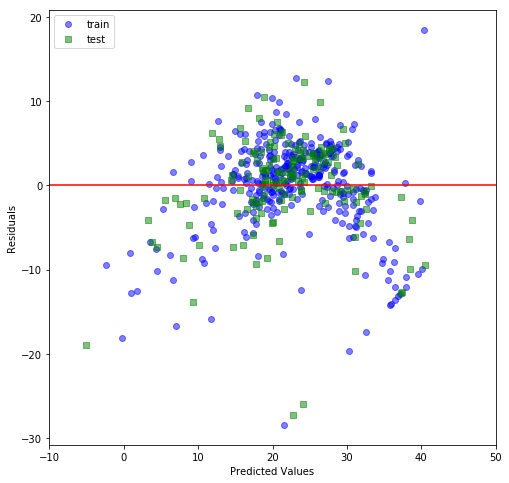

In [71]:
res_plot(y_train, lr2.predict(X_lin_train), y_test, lr2.predict(X_lin_test))

残差プロットを見ると、曲線状に残差が分布していることがわかる。
これはLSTATvsMEDVの曲線的な関係を直線で回帰していることに由来すると考えられる。

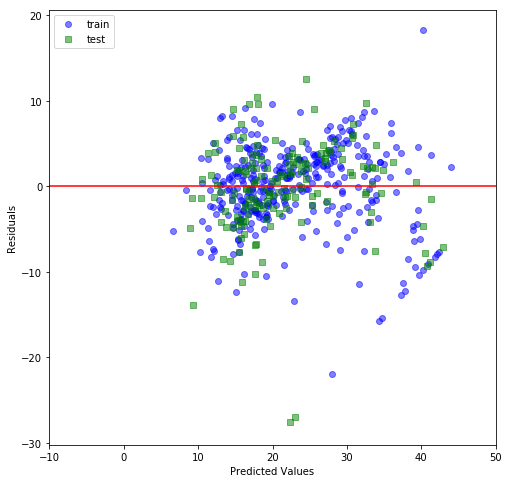

In [73]:
res_plot(y_train,lr_q3d2.predict(X_q3d_train),y_test,lr_q3d2.predict(X_q3d_test))

残差プロットの曲線が吸収されていることが見てわかる。

In [74]:
data

NameError: name 'data' is not defined

In [76]:
pd.DataFrame(boston_df[boston_df.MEDV>=50])

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
161,1.46336,0.0,19.58,0.0,0.6050,7.489,90.8,1.9709,5.0,403.0,14.7,374.43,1.73,50.0
162,1.83377,0.0,19.58,1.0,0.6050,7.802,98.2,2.0407,5.0,403.0,14.7,389.61,1.92,50.0
163,1.51902,0.0,19.58,1.0,0.6050,8.375,93.9,2.1620,5.0,403.0,14.7,388.45,3.32,50.0
166,2.01019,0.0,19.58,0.0,0.6050,7.929,96.2,2.0459,5.0,403.0,14.7,369.30,3.70,50.0
186,0.05602,0.0,2.46,0.0,0.4880,7.831,53.6,3.1992,3.0,193.0,17.8,392.63,4.45,50.0
195,0.01381,80.0,0.46,0.0,0.4220,7.875,32.0,5.6484,4.0,255.0,14.4,394.23,2.97,50.0
204,0.02009,95.0,2.68,0.0,0.4161,8.034,31.9,5.1180,4.0,224.0,14.7,390.55,2.88,50.0
225,0.52693,0.0,6.20,0.0,0.5040,8.725,83.0,2.8944,8.0,307.0,17.4,382.00,4.63,50.0
257,0.61154,20.0,3.97,0.0,0.6470,8.704,86.9,1.8010,5.0,264.0,13.0,389.70,5.12,50.0
267,0.57834,20.0,3.97,0.0,0.5750,8.297,67.0,2.4216,5.0,264.0,13.0,384.54,7.44,50.0


In [85]:
new_data=boston_df[boston_df.MEDV != 50]
len(new_data[new_data.MEDV==50.0])

0

In [86]:
new_lstat=new_data.loc[:,['LSTAT']].values
new_rm=new_data.loc[:,['RM']].values
new_y=new_data.loc[:,['MEDV']].values

In [87]:
new_quad=PolynomialFeatures(degree=2)
new_lsquad=new_quad.fit_transform(new_lstat)
nlq_train,nlq_test,ny_train,ny_test=train_test_split(new_lstat,new_y,test_size=0.3,random_state=0)

In [88]:
new_lr=LinearRegression()
new_lr.fit(nlq_train,ny_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

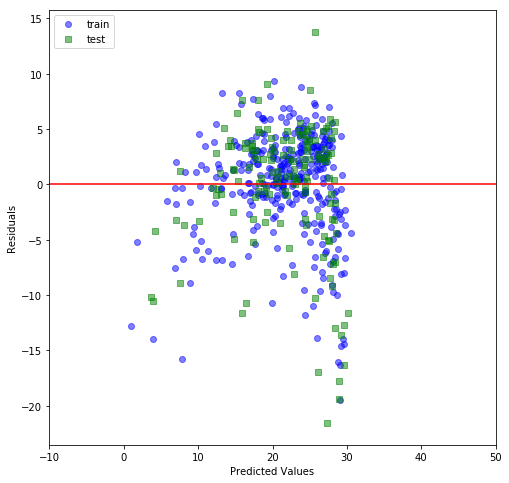

In [89]:
res_plot(ny_train,new_lr.predict(nlq_train),ny_test,new_lr.predict(nlq_test))

In [91]:
# 2次関数
print('model_quad')
print('train: %.3f' % adjusted(new_lr.score(nlq_train, ny_train), len(ny_train), 2))
print('test : %.3f' % adjusted(new_lr.score(nlq_test, ny_test), len(ny_test), 2))
print('') 
#ノイズ除去した方が悪い？

model_quad
train: 0.593
test : 0.538



In [92]:
X_lin=np.hstack([new_lstat,new_rm])

In [94]:
X_lin_train,X_lin_test,ny_train,ny_test=train_test_split(X_lin,new_y,test_size=0.3,random_state=0)

In [95]:
new_lr.fit(X_lin_train,ny_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [96]:
# 2次関数
print('model_quad')
print('train: %.3f' % adjusted(new_lr.score(X_lin_train, ny_train), len(ny_train), 2))
print('test : %.3f' % adjusted(new_lr.score(X_lin_test, ny_test), len(ny_test), 2))
print('') 
#rmありだとよくなる。

model_quad
train: 0.659
test : 0.641

